In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime as dt
from IPython.display import display,HTML
from calendar import HTMLCalendar
from matplotlib import pyplot as plt
import seaborn as sns
import calplot

# Bathing Water Data

In [2]:
prf = pd.read_csv("~data/pollution_risk_forecasting.csv")
prf = prf[prf['time'] < '2023-01-01']
prf

,site,time,riskLevelLabel
0,ukc1101-06000,2020-05-14,0
1,ukc1101-06000,2020-05-15,0
2,ukc1101-06000,2020-05-16,0
3,ukc1101-06000,2020-05-17,0
4,ukc1101-06000,2020-05-18,0
...,...,...,...
207010,ukk4307-33900,2022-09-26,0
207011,ukk4307-33900,2022-09-27,0
207012,ukk4307-33900,2022-09-28,0
207013,ukk4307-33900,2022-09-29,0


In [3]:
prf['site'].nunique()

424

In [4]:
unique_pairs = prf.groupby('time')['site'].nunique()
percentage_list = [[index, value] for index, value in unique_pairs.items()]

In [5]:
pct = pd.DataFrame(percentage_list, columns = ['time','Percentage'])
pct['time'] = pd.to_datetime(pct['time'])
pct = pct.set_index('time')
pct

,Percentage
time,
2020-01-22,1
2020-02-17,1
2020-02-29,1
2020-03-01,1
2020-03-12,1
...,...
2022-11-08,1
2022-12-02,1
2022-12-07,1


(<Figure size 3000x1300 with 4 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>], dtype=object))

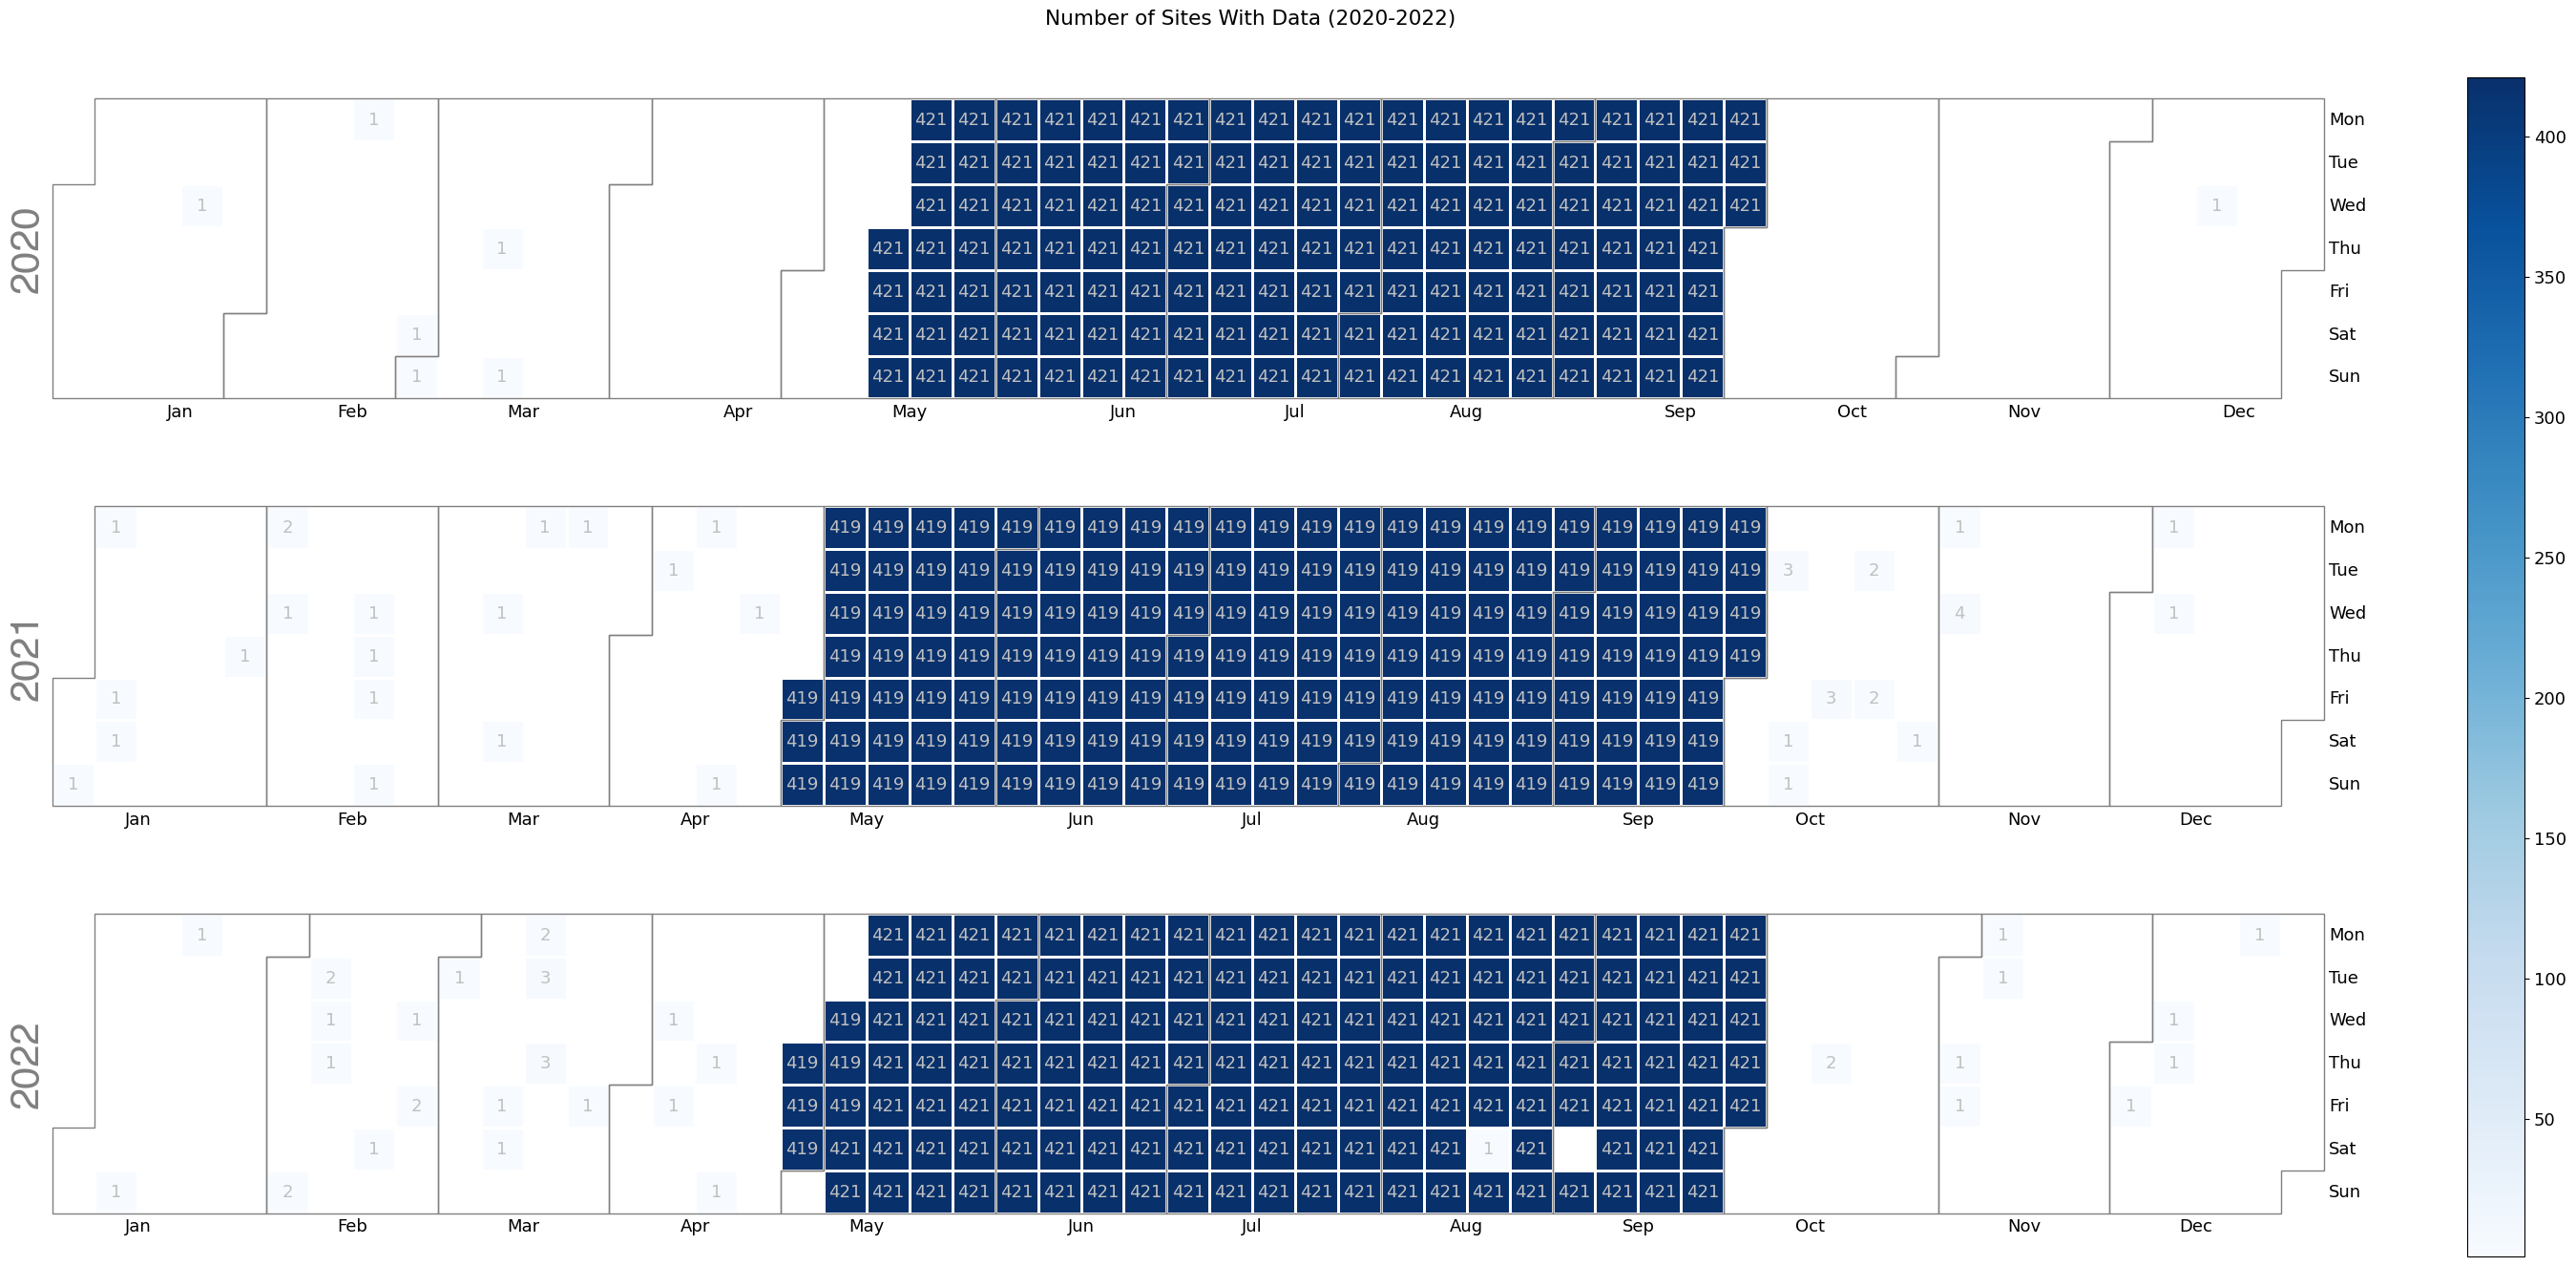

In [6]:
plt.rcParams['font.size'] = '13'

calplot.calplot(data = pct['Percentage'], how = 'sum', cmap = 'Blues', yearlabels = True,
                figsize = (30, 13), textformat='{:.0f}', textcolor = 'silver', fillcolor='w', 
                suptitle = "Number of Sites With Data (2020-2022)")

# Satellite Data

In [7]:
sites_data = pd.read_csv("~data/sites_data_15x15.csv")
sites_data

,Unnamed: 0,time,lat,lon,BBP,CDM,site,SPM,KD490,ZSD,CHL,grid_index
0,58197810,2020-01-01,54.588543,-1.255207,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN,1
1,58197811,2020-01-01,54.588543,-1.244790,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN,2
2,58197812,2020-01-01,54.588543,-1.234374,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN,3
3,58197813,2020-01-01,54.588543,-1.223957,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN,4
4,58197814,2020-01-01,54.588543,-1.213540,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
106037995,53018785,2022-12-31,51.119793,-4.203124,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN,221
106037996,53018786,2022-12-31,51.119793,-4.192707,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN,222
106037997,53018787,2022-12-31,51.119793,-4.182291,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN,223
106037998,53018788,2022-12-31,51.119793,-4.171874,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN,224


In [13]:
sites_data.columns[[4,5,7,8,9,10]]

Index(['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'], dtype='object')

In [8]:
sites_data_new = sites_data.dropna(subset=sites_data.columns[[4,5,7,8,9,10]], how='any')
sites_data_new

,Unnamed: 0,time,lat,lon,BBP,CDM,site,SPM,KD490,ZSD,CHL,grid_index
2674806,36749691,2020-01-28,50.265625,-4.213541,0.029784,0.094746,ukk3101-26520,3.992888,0.117488,6.546428,1.487302,7
2674807,36749692,2020-01-28,50.265625,-4.203124,0.029785,0.094759,ukk3101-26520,3.622037,0.122826,6.208275,1.605407,8
2674808,36749693,2020-01-28,50.265625,-4.192707,0.029818,0.095326,ukk3101-26520,3.324493,0.118298,6.494094,1.505121,9
2674809,36749694,2020-01-28,50.265625,-4.182291,0.032194,0.103711,ukk3101-26520,3.191412,0.116809,6.588715,1.472216,10
2674810,36749695,2020-01-28,50.265625,-4.171874,0.032679,0.105386,ukk3101-26520,3.147314,0.117506,6.546419,1.487814,11
...,...,...,...,...,...,...,...,...,...,...,...,...
101818198,68791663,2022-11-18,50.703125,-0.703124,0.058575,0.255178,ukj2403-15900,22.527493,0.201462,3.478883,3.663430,74
101818199,68791664,2022-11-18,50.703125,-0.692707,0.056912,0.250121,ukj2403-15900,18.205177,0.201561,3.476920,3.666350,75
101818212,68791647,2022-11-18,50.713543,-0.713540,0.059242,0.255812,ukj2403-15900,27.672237,0.198609,3.536452,3.579611,88
101818213,68791648,2022-11-18,50.713543,-0.703124,0.058722,0.254522,ukj2403-15900,25.311977,0.199307,3.522315,3.600096,89


In [18]:
unique_pairs = sites_data_new.groupby('time')['site'].nunique()
percentage_list = [[index, value] for index, value in unique_pairs.items()]

In [19]:
pct = pd.DataFrame(percentage_list, columns = ['time','Percentage'])
pct['time'] = pd.to_datetime(pct['time'])
pct = pct.set_index('time')
pct

,Percentage
time,
2020-01-28,22
2020-01-29,40
2020-02-01,64
2020-02-04,4
2020-02-05,23
...,...
2022-11-13,22
2022-11-14,80
2022-11-15,45


(<Figure size 3000x1300 with 4 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>], dtype=object))

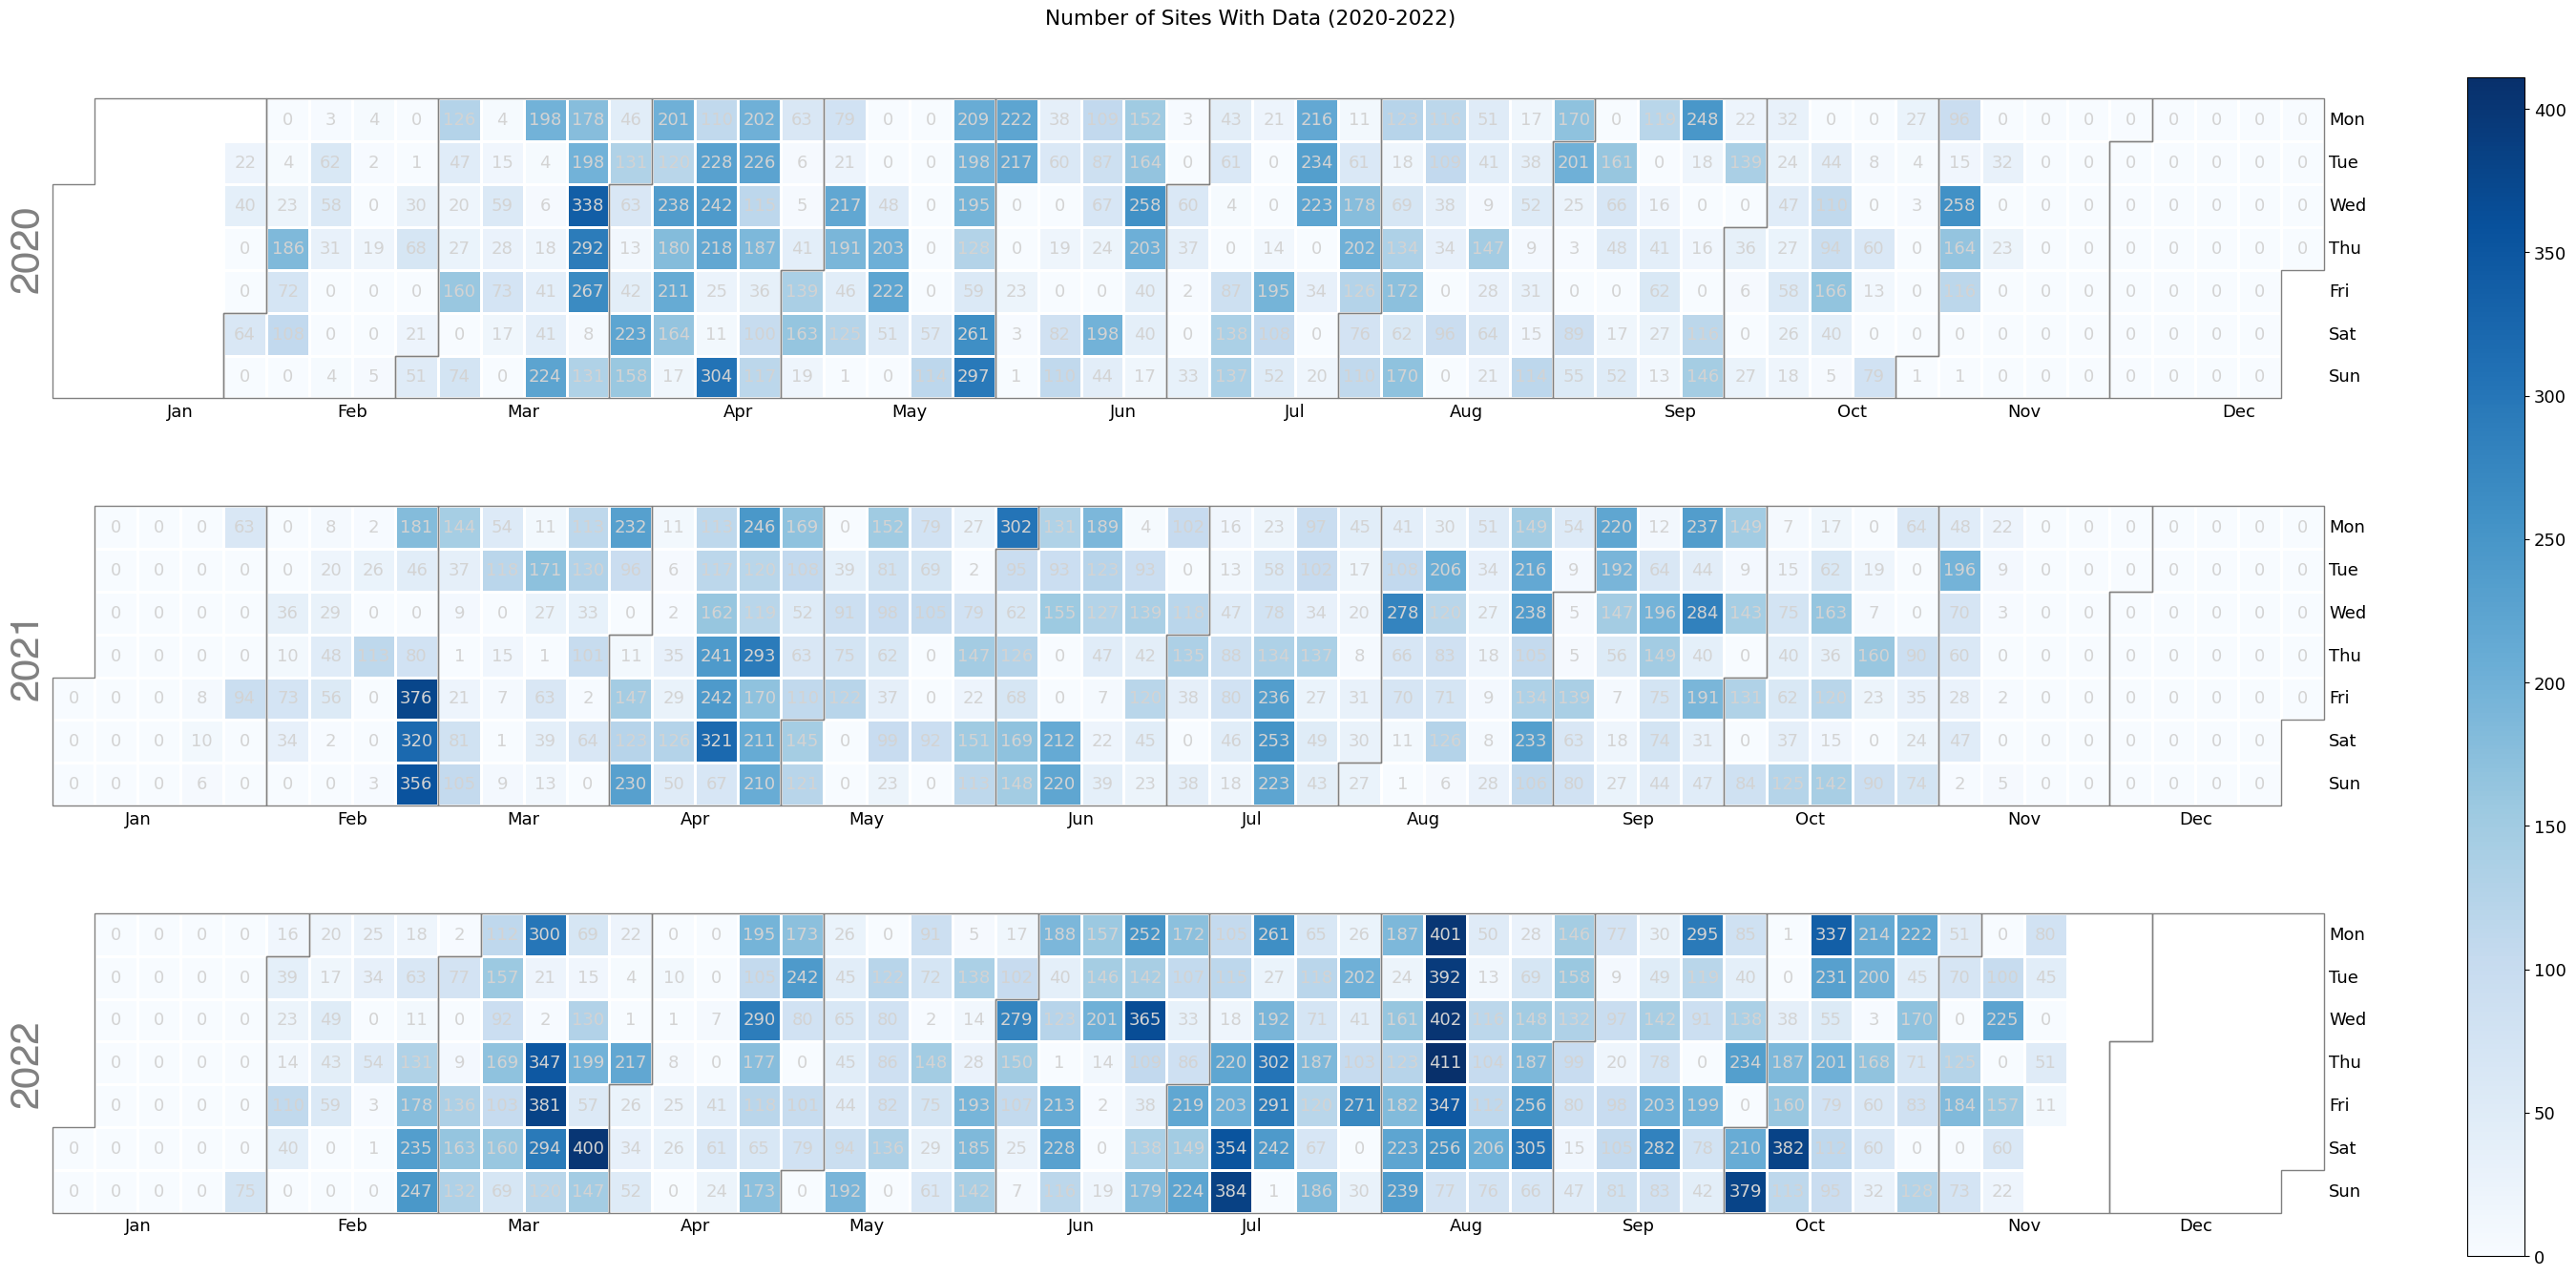

In [20]:
plt.rcParams['font.size'] = '13'

calplot.calplot(data = pct['Percentage'], how = 'sum', cmap = 'Blues', yearlabels = True,
                figsize = (30, 13), textformat='{:.0f}', textcolor = 'silver', fillcolor='w', 
                suptitle = "Number of Sites With Data (2020-2022)")